# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [3]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [4]:
#Change date from object to datetime
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])

In [5]:
pyber_data_df.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                  int64
driver_count             int64
type                    object
dtype: object

## Deliverable 1: Get a Summary DataFrame 

In [6]:
#Get the total rides for each city type
trides_per_city_type = pyber_data_df["type"].value_counts()
trides_per_city_type

Urban       1625
Suburban     625
Rural        125
Name: type, dtype: int64

In [7]:
#Drivers per each city type
drivers_per_city_type = city_data_df.groupby("type").driver_count.sum()
drivers_per_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
#  3. Get the total amount of fares for each city type
fares_per_city_type = pyber_data_df.groupby("type").fare.sum()
fares_per_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = fares_per_city_type / trides_per_city_type
avg_fare_per_ride

Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = fares_per_city_type / drivers_per_city_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
# Create a PyBer summary DataFrame.             
pyber_summary_df = pd.concat([trides_per_city_type, drivers_per_city_type, fares_per_city_type, avg_fare_per_ride, avg_fare_per_driver], axis = 1)
pyber_summary_df

,type,driver_count,fare,0,1
Urban,1625,2405,39854.38,24.525772,16.571468
Suburban,625,490,19356.33,30.970128,39.502714
Rural,125,78,4327.93,34.623440,55.486282


In [12]:
# Delete the index name
pyber_summary_df.index.name = None

In [13]:
# Re-name the columns
pyber_summary_df.columns = ["Total Rides", "Total Drivers", "Total Fares", "Average Fare per Ride", "Average Fare per Driver"]

# Format the data in each column
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map('${:,.2f}'.format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map('${:,.2f}'.format)

In [14]:
#print the dataframe
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57
Suburban,625,490,"$19,356.33",$30.97,$39.50
Rural,125,78,"$4,327.93",$34.62,$55.49


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [15]:
# Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
#Parse date to remove timestamp
pyber_data_df["date_p"] = [x.date() for x in pyber_data_df.date]
pyber_data_df

,city,date,fare,ride_id,driver_count,type,date_p
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban,2019-01-14
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban,2019-03-04
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban,2019-02-24
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban,2019-02-10
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban,2019-03-06
...,...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural,2019-04-29
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural,2019-01-30
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural,2019-02-10
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural,2019-05-07


In [17]:
# Using groupby() to create a new DataFrame showing the sum of the fares for each date where the indices are the city type and date.
date_type_ride_df = pyber_data_df.groupby(["date_p", "type"]).fare.sum().reset_index()
date_type_ride_df

,date_p,type,fare
0,2019-01-01,Rural,43.69
1,2019-01-01,Suburban,128.52
2,2019-01-01,Urban,127.78
3,2019-01-02,Rural,52.12
4,2019-01-02,Suburban,274.92
...,...,...,...
329,2019-05-06,Urban,181.20
330,2019-05-07,Rural,44.94
331,2019-05-07,Suburban,274.09
332,2019-05-07,Urban,258.01


In [18]:
# Set the "date" index to datetime datatype & check the datatype
date_type_ride_df["date_p"] = pd.to_datetime(date_type_ride_df["date_p"])
date_type_ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date_p  334 non-null    datetime64[ns]
 1   type    334 non-null    object        
 2   fare    334 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.0+ KB


In [19]:
# Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' to get the total fares for each type of city by the date. 
date_type_ride_df_pivot = date_type_ride_df.pivot(index="date_p", columns="type", values="fare")

In [27]:
# Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_type_ride_df = date_type_ride_df.loc['2019-01-01':'2019-04-29',:]

type,Rural,Suburban,Urban
date_p,,,
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29


In [26]:
# Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
date_type_ride_df = date_type_ride_df_pivot.resample("W").sum()

type,Rural,Suburban,Urban
date_p,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [22]:
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

[0.0, 2800.0]

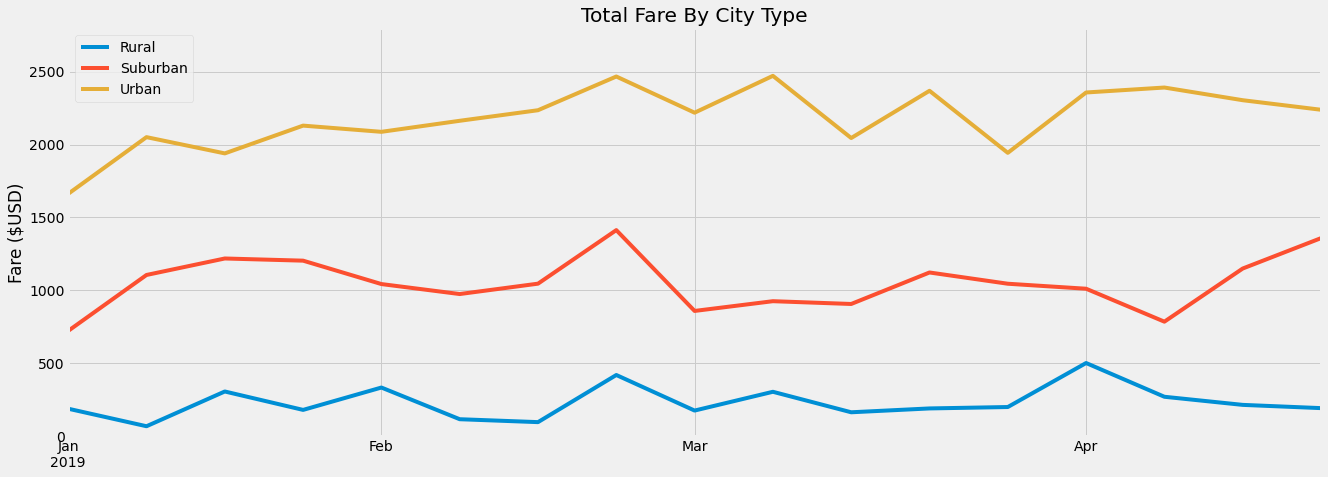

In [67]:
# Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
date_type_ride_df.plot(figsize=(20,7))

plt.xlabel("")
plt.ylabel("Fare ($USD)")
plt.title("Total Fare By City Type")
plt.legend(["Rural","Suburban","Urban"],loc="upper left")
plt.setp(plt.gca(), ylim=(0, 2800))
